In [1]:
import sys
import os
import tempfile
import json 

import numpy as np
from process_bigraph import pp
from process_bigraph.experiments.parameter_scan import RunProcess


sys.path.insert(0, '..')


from biosimulator_processes import CORE
from biosimulator_processes.services.rest_service import BiosimulationsRestService
from biosimulator_processes.instance import generate_ode_instance, plot_ode_output_data
from biosimulator_processes.steps.ode_simulation import CopasiStep, TelluriumStep, AmiciStep
from biosimulator_processes.io import parse_expected_timecourse_config

Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici']
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [2]:
omex_dir = '../test_suite/examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations'

### Example A: Run single `copasi-step` using just a single omex archive dirpath as entrypoint. The Time config is inferred from the respected results file. OMEX archives provide a layer of verification prior to the simulation.

In [3]:
copasi_step = CopasiStep(archive_dirpath=omex_dir)

[0.0, 0.2, 0.4, 199.8, 200]
../test_suite/examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/Caravagna2010.xml
True


In [4]:
copasi_step.outputs()

{'time': 'list[float]',
 'floating_species': {'T': 'float', 'E': 'float', 'I': 'float'}}

In [5]:
copasi_result = copasi_step.update({})

/Users/alex/Desktop/uchc_work/repos/biosimulator-processes/demos/../biosimulator_processes/steps/ode_simulation.py:204: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



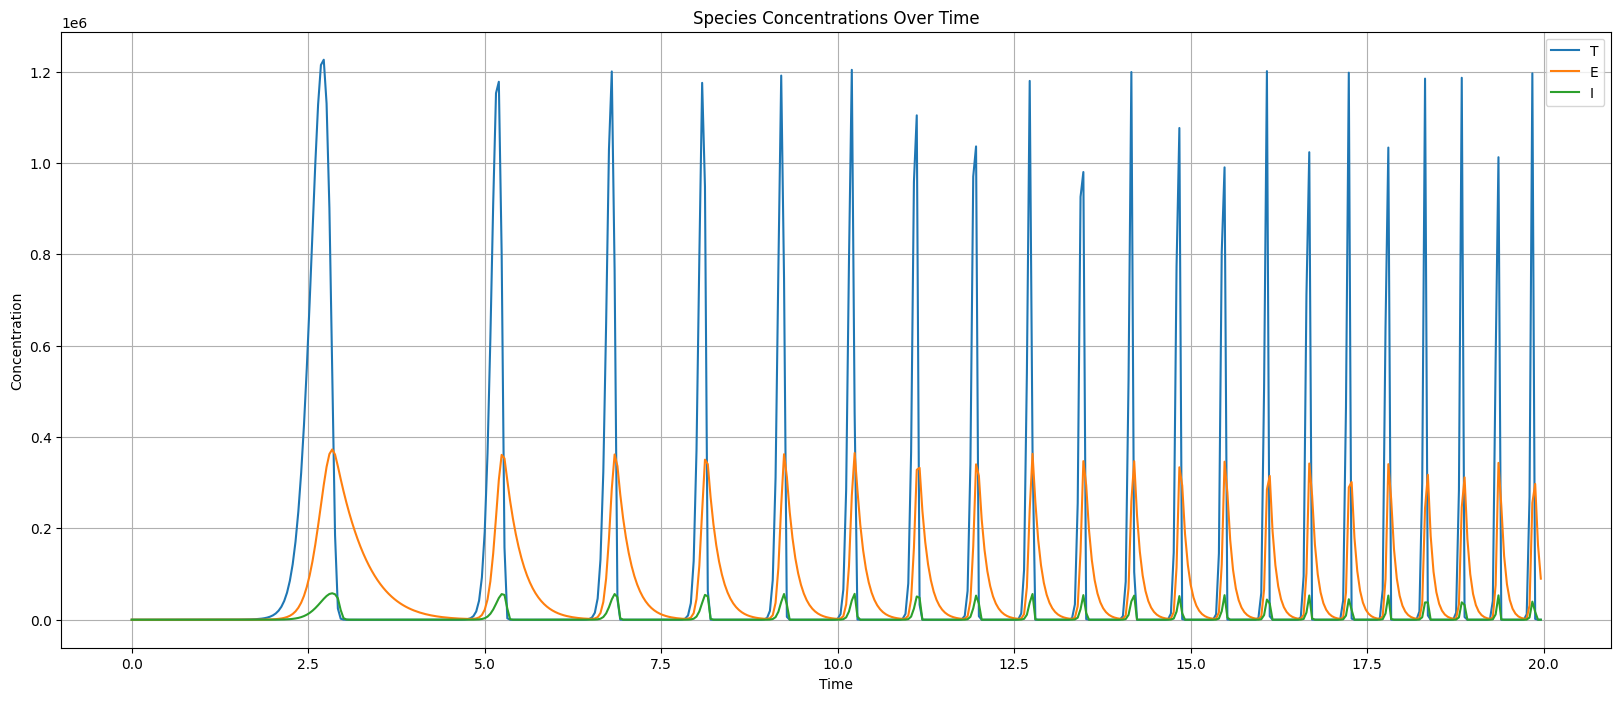

In [28]:
plot_ode_output_data(copasi_result, sample_size=500)

In [7]:
# Using the higher-level api
from biosimulator_processes.instance import run_copasi_step_from_omex

copasi_results_from_api = run_copasi_step_from_omex(omex_dir)

[0.0, 0.2, 0.4, 199.8, 200]
../test_suite/examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/Caravagna2010.xml
True


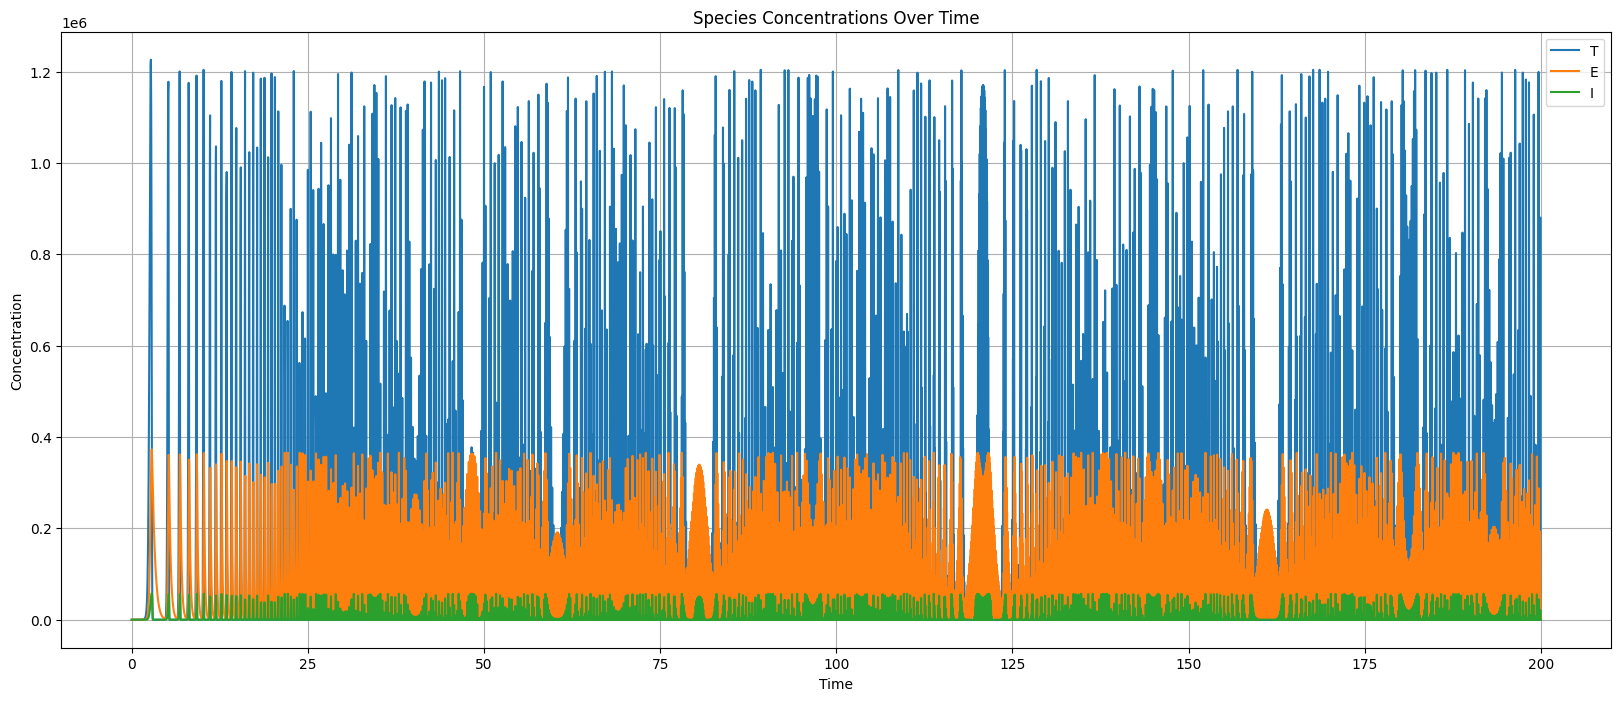

In [8]:
# results have plotting built-in

copasi_results_from_api.plot()

### Example B: Specify an sbml model filepath and custom time configuration

In [9]:
model_fp = os.path.join(omex_dir, 'Caravagna2010.xml')
step_size = 0.25
duration = 100.0
num_steps = 200.0

### Example C: Specify a `process_bigraph`-style `Step` configuration which adhere's to the given implementation's `config_schema`; in this case, `ODESimulation`.

In [10]:
ode_process_config = {
    'model': {'model_source': model_fp},
    'time_config': {
        'step_size': 0.01,
        'duration': 100.0,
        'num_steps': 2000.0
    }
}

In [11]:
sum([1, 2])

3

In [12]:
t = np.linspace(0, 200, 1000)

t * 0.1

array([ 0.        ,  0.02002002,  0.04004004,  0.06006006,  0.08008008,
        0.1001001 ,  0.12012012,  0.14014014,  0.16016016,  0.18018018,
        0.2002002 ,  0.22022022,  0.24024024,  0.26026026,  0.28028028,
        0.3003003 ,  0.32032032,  0.34034034,  0.36036036,  0.38038038,
        0.4004004 ,  0.42042042,  0.44044044,  0.46046046,  0.48048048,
        0.5005005 ,  0.52052052,  0.54054054,  0.56056056,  0.58058058,
        0.6006006 ,  0.62062062,  0.64064064,  0.66066066,  0.68068068,
        0.7007007 ,  0.72072072,  0.74074074,  0.76076076,  0.78078078,
        0.8008008 ,  0.82082082,  0.84084084,  0.86086086,  0.88088088,
        0.9009009 ,  0.92092092,  0.94094094,  0.96096096,  0.98098098,
        1.001001  ,  1.02102102,  1.04104104,  1.06106106,  1.08108108,
        1.1011011 ,  1.12112112,  1.14114114,  1.16116116,  1.18118118,
        1.2012012 ,  1.22122122,  1.24124124,  1.26126126,  1.28128128,
        1.3013013 ,  1.32132132,  1.34134134,  1.36136136,  1.38

In [13]:
tlog = np.logspace(1, 200, 1000)
tlin = np.linspace(0, 200, 1000)

In [14]:
tlin

array([  0.        ,   0.2002002 ,   0.4004004 ,   0.6006006 ,
         0.8008008 ,   1.001001  ,   1.2012012 ,   1.4014014 ,
         1.6016016 ,   1.8018018 ,   2.002002  ,   2.2022022 ,
         2.4024024 ,   2.6026026 ,   2.8028028 ,   3.003003  ,
         3.2032032 ,   3.4034034 ,   3.6036036 ,   3.8038038 ,
         4.004004  ,   4.2042042 ,   4.4044044 ,   4.6046046 ,
         4.8048048 ,   5.00500501,   5.20520521,   5.40540541,
         5.60560561,   5.80580581,   6.00600601,   6.20620621,
         6.40640641,   6.60660661,   6.80680681,   7.00700701,
         7.20720721,   7.40740741,   7.60760761,   7.80780781,
         8.00800801,   8.20820821,   8.40840841,   8.60860861,
         8.80880881,   9.00900901,   9.20920921,   9.40940941,
         9.60960961,   9.80980981,  10.01001001,  10.21021021,
        10.41041041,  10.61061061,  10.81081081,  11.01101101,
        11.21121121,  11.41141141,  11.61161161,  11.81181181,
        12.01201201,  12.21221221,  12.41241241,  12.61

In [15]:
6.43885743e+008

643885743.0

In [16]:
copasi_step.t[-2]

199.96

In [17]:
dur = 200
n = 1000 

t = np.linspace(0, dur, n)

In [18]:
t[-2]

199.7997997997998

In [19]:
copasi_step.duration

200

In [20]:
from biosimulator_processes.io import parse_expected_timecourse_config


p = parse_expected_timecourse_config(omex_dir)

[0.0, 0.2, 0.4, 199.8, 200]


In [21]:
p

{'duration': 200, 'step_size': 1.0, 'num_steps': 5001}

In [22]:
copasi_step.t[-1]

200.0

In [23]:
copasi_step.t.shape

(5001,)

In [24]:
report_outputs = BiosimulationsRestService.read_report_outputs(os.path.join(omex_dir, 'reports.h5'))

In [25]:
report_outputs.data[1].data.shape

(5001,)

In [26]:
np.array(copasi_result['floating_species']['T']).shape

(5001,)